In [ ]:
from bert_score import score

# 假设我们有生成的句子（hypothesis）和参考句子（reference）
hypotheses = ["the cat is on the mat", "there is a cat on the mat"]
references = ["there is a cat on the mat", "the cat is on the mat"]

# 计算 BERTScore
P, R, F1 = score(hypotheses, references, lang="en", verbose=True)

print(f"Precision: {P.mean():.4f}")
print(f"Recall: {R.mean():.4f}")
print(f"F1: {F1.mean():.4f}")


model_type: /home/zhuangjt/zhuangjt_disk3/SELECT/PLM/roberta-large


Some weights of the model checkpoint at /home/zhuangjt/zhuangjt_disk3/SELECT/PLM/roberta-large were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 48.29it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 366.09it/s]

done in 0.03 seconds, 66.03 sentences/sec
Precision: 0.9273
Recall: 0.9273
F1: 0.9273


: 

In [14]:
from pycocotools.coco import COCO
from pycocoevalcap.cider.cider import Cider

# 示例数据
annotations = {
    'image1': [ 'A dog running with a ball'],
    'image2': [ 'A cat resting on the couch']
}
predictions = {
    'image1': ['A dog playing with a ball'],
    'image2': ['A cat sleeping on the sofa']
}

# 创建 COCO 对象
coco = COCO()

# 初始化 CIDEr 评估器
cider_scorer = Cider()

# 计算 CIDEr 得分
scores, _ = cider_scorer.compute_score(predictions,annotations)

# 输出结果
print(f"CIDEr Score: {scores:.2f}")

CIDEr:  3.312500000000001
CIDEr Score: 3.31


In [8]:
from bleurt import score

checkpoint = "/home/zhuangjt/zhuangjt_disk3/SELECT/bleurt-master/bleurt/test_checkpoint"
references = ["This is a test.", "This is another test."]
candidates = ["This is the test.", "This is another test."]

scorer = score.BleurtScorer(checkpoint)
scores = scorer.score(references=references, candidates=candidates)
print(scores)

INFO:tensorflow:Reading checkpoint /home/zhuangjt/zhuangjt_disk3/SELECT/bleurt-master/bleurt/test_checkpoint.
INFO:tensorflow:Config file found, reading.
INFO:tensorflow:Will load checkpoint dbleurt_tiny
INFO:tensorflow:Loads full paths and checks that files exists.
INFO:tensorflow:... name:dbleurt_tiny
INFO:tensorflow:... vocab_file:vocab.txt
INFO:tensorflow:... bert_config_file:bert_config.json
INFO:tensorflow:... do_lower_case:True
INFO:tensorflow:... max_seq_length:512
INFO:tensorflow:Creating BLEURT scorer.
INFO:tensorflow:Creating WordPiece tokenizer.
INFO:tensorflow:WordPiece tokenizer instantiated.
INFO:tensorflow:Creating Eager Mode predictor.
INFO:tensorflow:Loading model.


2024-10-27 14:50:45.065644: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-27 14:50:45.066122: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-27 14:50:45.069799: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

INFO:tensorflow:BLEURT initialized.


INFO:tensorflow:BLEURT initialized.
2024-10-27 14:50:48.256755: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


[0.7463122606277466, 0.9303443431854248]


In [ ]:
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# 示例数据
references = [
    ["there was a cat on the mat"],
    ["he read a book"]
]
hypotheses = [
    "the cat was sitting on the mat",
    "he read a book"
]

# 初始化平滑处理
smoothing_function = SmoothingFunction().method1

# 计算近似的 GLEU 分数（只考虑1-gram和2-gram）
gleu_scores = []
for ref_list, hyp in zip(references, hypotheses):
    # 使用 weights 参数来只考虑 1-gram 和 2-gram
    score = sentence_bleu(ref_list, hyp, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothing_function)
    gleu_scores.append(score)

# 输出结果
print(f"GLEU Scores: {gleu_scores}")
average_gleu = sum(gleu_scores) / len(gleu_scores)
print(f"Average GLEU Score: {average_gleu:.2f}")


0.03555795011093797
0.07032108464077433
GLEU Scores: [0.03555795011093797, 0.07032108464077433]
Average GLEU Score: 0.05


In [7]:
from bert_score import score as bert_score
from pycocotools.coco import COCO
from pycocoevalcap.cider.cider import Cider
from bleurt import score as bleurt_score
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import json

# 示例数据
hypotheses = ["the cat was sitting on the mat", "he read a book"]
references = [["there was a cat on the mat"], ["he read a book"]]

# BLEURT checkpoint path
bleurt_checkpoint = "/home/zhuangjt/zhuangjt_disk3/SELECT/bleurt-master/bleurt/test_checkpoint"

# CIDEr annotations/predictions格式
annotations = {'image' + str(i): refs for i, refs in enumerate(references, start=1)}
predictions = {'image' + str(i): [hyp] for i, hyp in enumerate(hypotheses, start=1)}

# 统一函数
def calculate_metrics(hypotheses, references):
    # BERTScore
    P, R, F1 = bert_score(hypotheses, [" ".join(ref) for ref in references], lang="en", verbose=True)
    bertscore_f1 = F1.mean().item()

    # CIDEr
    coco = COCO()  # 创建COCO对象
    coco.dataset['images'] = [{'id': k} for k in annotations.keys()]
    # 添加'id'字段到annotations的每一项
    coco.dataset['annotations'] = [{'image_id': k, 'id': idx + 1, 'caption': refs[0]} for idx, (k, refs) in enumerate(annotations.items())]
    coco.createIndex()
    cider_scorer = Cider()
    cider_score, _ = cider_scorer.compute_score(coco, predictions)

    # BLEURT
    bleurt_scorer = bleurt_score.BleurtScorer(bleurt_checkpoint)
    bleurt_scores = bleurt_scorer.score(references=[" ".join(ref) for ref in references], candidates=hypotheses)
    bleurt_score_mean = sum(bleurt_scores) / len(bleurt_scores)

    # GLEU (1-gram and 2-gram)
    smoothing_function = SmoothingFunction().method1
    gleu_scores = [
        sentence_bleu(ref, hyp, weights=(0.5, 0.5, 0, 0), smoothing_function=smoothing_function)
        for ref, hyp in zip(references, hypotheses)
    ]
    average_gleu = sum(gleu_scores) / len(gleu_scores)

    # 结果汇总
    results = {
        "BERTScore_F1": bertscore_f1,
        "CIDEr": cider_score,
        "BLEURT": bleurt_score_mean,
        "GLEU": average_gleu
    }
    return results

# 计算并打印结果
metrics = calculate_metrics(hypotheses, references)
print(json.dumps(metrics, indent=2))


model_type: /home/zhuangjt/zhuangjt_disk3/SELECT/PLM/roberta-large


Some weights of the model checkpoint at /home/zhuangjt/zhuangjt_disk3/SELECT/PLM/roberta-large were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 50.16it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 372.20it/s]

done in 0.03 seconds, 69.42 sentences/sec
creating index...
index created!


AttributeError: 'COCO' object has no attribute 'keys'

In [33]:
import numpy as np
from scipy import stats
import pandas as pd

# 定义数据
data = {
    "Gleu": [66.70, 66.16, 65.39, 64.68, 66.16],
    "Bleu": [28.88, 28.63, 28.84, 26.30, 27.22],
    "Motor": [25.99, 25.61, 25.30, 24.55, 25.67],
    "Bert-Score": [91.87, 91.63, 91.52, 91.05, 91.64],
    "Cider": [24.01, 23.45, 22.16, 21.62, 22.51],
    "Entailment": [56.47, 54.49, 54.47, 52.44, 58.08],
    "Interesting": [24.33, 24.56, 23.85, 25.78, 24.92]
}

# 计算统计量
results = []
for col in data:
    scores = data[col]
    mean = np.mean(scores)
    std_dev = np.std(scores, ddof=1)  # 无偏估计
    cv = (std_dev / mean) * 100  # 计算变异系数(百分比)
    n = len(scores)
    t_critical = stats.t.ppf(0.975, df=n-1)
    ci_lower = mean - t_critical * (std_dev / np.sqrt(n))
    ci_upper = mean + t_critical * (std_dev / np.sqrt(n))
    results.append([col, mean, std_dev, f"{cv:.2f}%", f"[{ci_lower:.2f}, {ci_upper:.2f}]"])

# 转换为DataFrame输出
df_results = pd.DataFrame(results, columns=["Metric", "Mean", "Std Dev", "CV (%)", "95% CI"])
print(df_results)

        Metric    Mean   Std Dev CV (%)          95% CI
0         Gleu  65.818  0.788999  1.20%  [64.84, 66.80]
1         Bleu  27.974  1.158870  4.14%  [26.54, 29.41]
2        Motor  25.424  0.546516  2.15%  [24.75, 26.10]
3   Bert-Score  91.542  0.303101  0.33%  [91.17, 91.92]
4        Cider  22.750  0.969562  4.26%  [21.55, 23.95]
5   Entailment  55.190  2.154147  3.90%  [52.52, 57.86]
6  Interesting  24.688  0.723374  2.93%  [23.79, 25.59]


/tmp/ipykernel_2156695/3369014907.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following famil

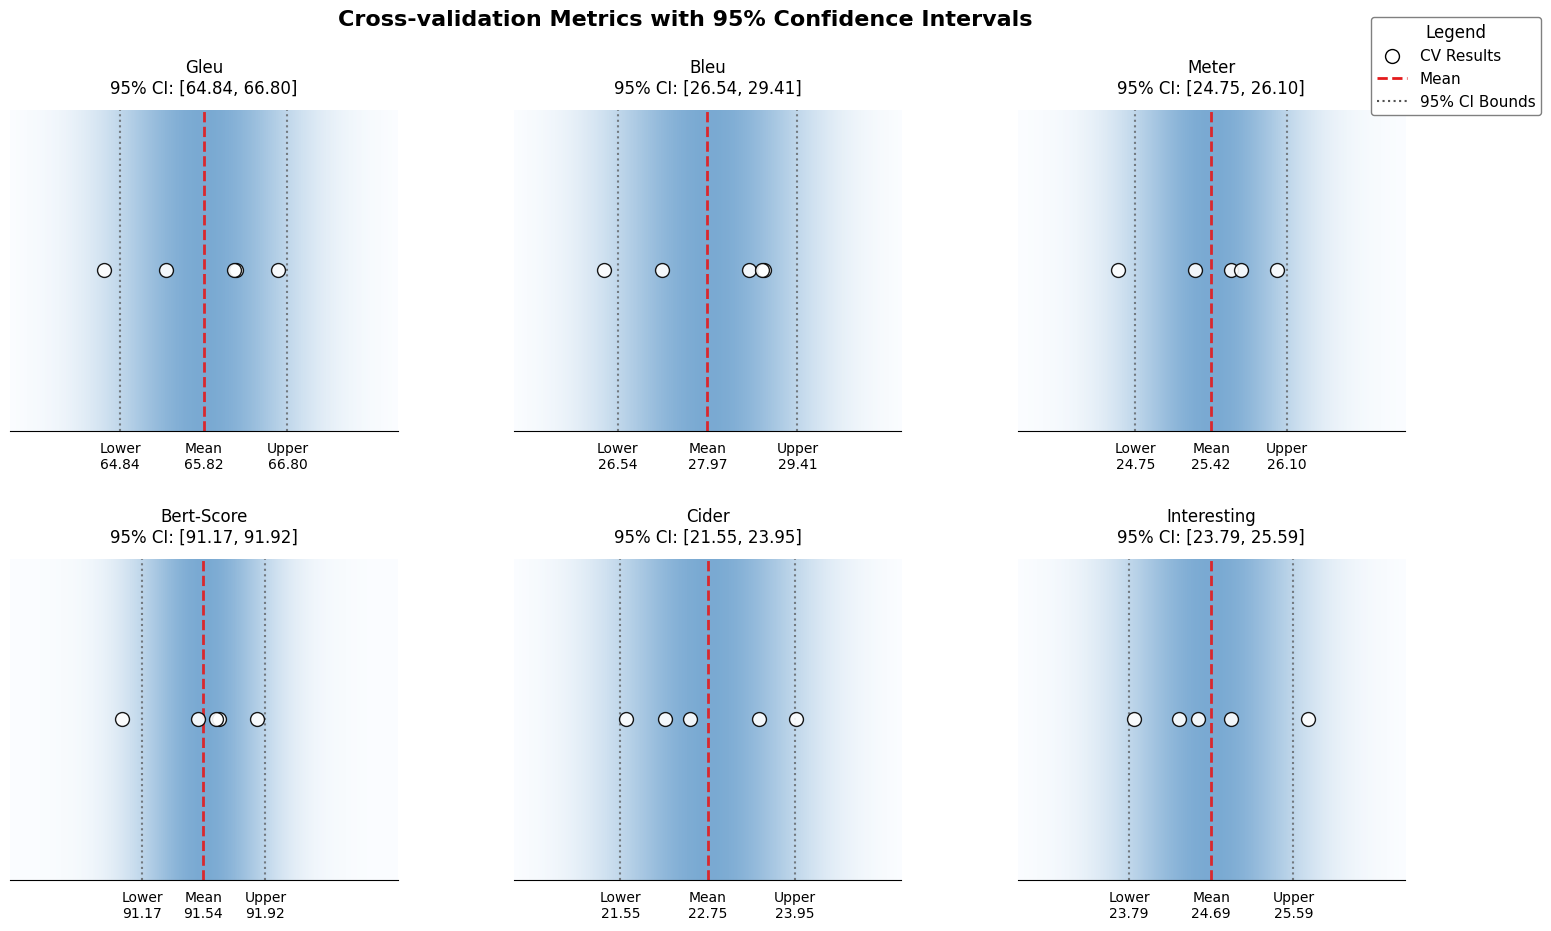

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.gridspec import GridSpec

# 数据准备
metrics = {
    "Gleu": {"data": [66.70, 66.16, 65.39, 64.68, 66.16], "mean": 65.818, "ci": (64.84, 66.80), "std": 0.789},
    "Bleu": {"data": [28.88, 28.63, 28.84, 26.30, 27.22], "mean": 27.974, "ci": (26.54, 29.41), "std": 1.159},
    "Meteor": {"data": [25.99, 25.61, 25.30, 24.55, 25.67], "mean": 25.424, "ci": (24.75, 26.10), "std": 0.547},
    "Bert-Score": {"data": [91.87, 91.63, 91.52, 91.05, 91.64], "mean": 91.542, "ci": (91.17, 91.92), "std": 0.303},
    "Cider": {"data": [24.01, 23.45, 22.16, 21.62, 22.51], "mean": 22.750, "ci": (21.55, 23.95), "std": 0.970},
    "Interesting": {"data": [24.33, 24.56, 23.85, 25.78, 24.92], "mean": 24.688, "ci": (23.79, 25.59), "std": 0.723}
}

# 创建2×3的画布
fig = plt.figure(figsize=(18, 10))
gs = GridSpec(2, 3, hspace=0.4, wspace=0.3)

# 统一配色方案
cmap = LinearSegmentedColormap.from_list("uni_ci", ["#f7fbff", "#2171b5"])
mean_color = '#e41a1c'
ci_color = '#525252'
point_color = 'white'
point_edge = 'black'

# 循环绘制6个子图
for idx, (metric, values) in enumerate(metrics.items()):
    ax = fig.add_subplot(gs[idx//3, idx%3])
    
    # 计算数据范围（动态调整）
    x_min = min(values["ci"][0] - values["std"], min(values["data"])) - 0.5
    x_max = max(values["ci"][1] + values["std"], max(values["data"])) + 0.5
    x = np.linspace(x_min, x_max, 200)
    y = norm.pdf(x, values["mean"], values["std"])
    
    # 绘制梯度背景
    ax.imshow(np.tile(y, (100, 1)), 
             aspect='auto', 
             cmap=cmap,
             extent=[x_min, x_max, 0, 1], 
             alpha=0.6)
    
    # 绘制数据点（带抖动避免重叠）
    x_jitter = np.random.normal(0, 0.02, len(values["data"]))
    for i, val in enumerate(values["data"]):
        ax.scatter(val + x_jitter[i], 0.5, 
                  s=100, ec=point_edge, fc=point_color, 
                  lw=1, zorder=10, alpha=0.9)
    
    # 标记关键线
    ax.axvline(values["mean"], color=mean_color, ls='--', lw=2, alpha=0.9)
    ax.axvline(values["ci"][0], color=ci_color, ls=':', lw=1.5, alpha=0.7)
    ax.axvline(values["ci"][1], color=ci_color, ls=':', lw=1.5, alpha=0.7)
    
    # 设置坐标轴
    ax.spines['bottom'].set_position(('data', 0))
    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)
    
    # 设置刻度标签
    ax.set_xticks([values["ci"][0], values["mean"], values["ci"][1]])
    ax.set_xticklabels([
        f"Lower\n{values['ci'][0]:.2f}",
        f"Mean\n{values['mean']:.2f}",
        f"Upper\n{values['ci'][1]:.2f}"
    ], fontsize=10)
    ax.tick_params(axis='x', length=0, pad=8)
    ax.set_yticks([])
    
    # 添加标题和CI标注
    ax.set_title(f"{metric}\n95% CI: [{values['ci'][0]:.2f}, {values['ci'][1]:.2f}]", 
                pad=12, fontsize=12)

# 添加全局图例
legend_elements = [
    plt.Line2D([], [], marker='o', markeredgecolor=point_edge, markerfacecolor=point_color,
              markersize=10, label='CV Results', linestyle=''),
    plt.Line2D([], [], color=mean_color, linestyle='--', lw=2, label='Mean'),
    plt.Line2D([], [], color=ci_color, linestyle=':', lw=1.5, label='95% CI Bounds')
]

fig.legend(handles=legend_elements, 
           loc='upper right', 
           bbox_to_anchor=(0.98, 0.98),
           frameon=True,
           framealpha=1,
           edgecolor='gray',
           fontsize=11,
           title="Legend", 
           title_fontsize=12)

plt.suptitle("Cross-validation Metrics with 95% Confidence Intervals", 
             y=0.98, fontsize=16, weight='bold')
plt.tight_layout()
plt.savefig('uniform_metrics.png', dpi=600, bbox_inches='tight')
plt.show()